In [60]:
# import pandas as pd 
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# data = pd.read_csv('bg_master_1.csv')
# data.head(10)
data.columns


Index(['Unnamed: 0', 'DATE2', 'ENTRIES', 'EXITS', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN', 'is_weekend'],
      dtype='object')

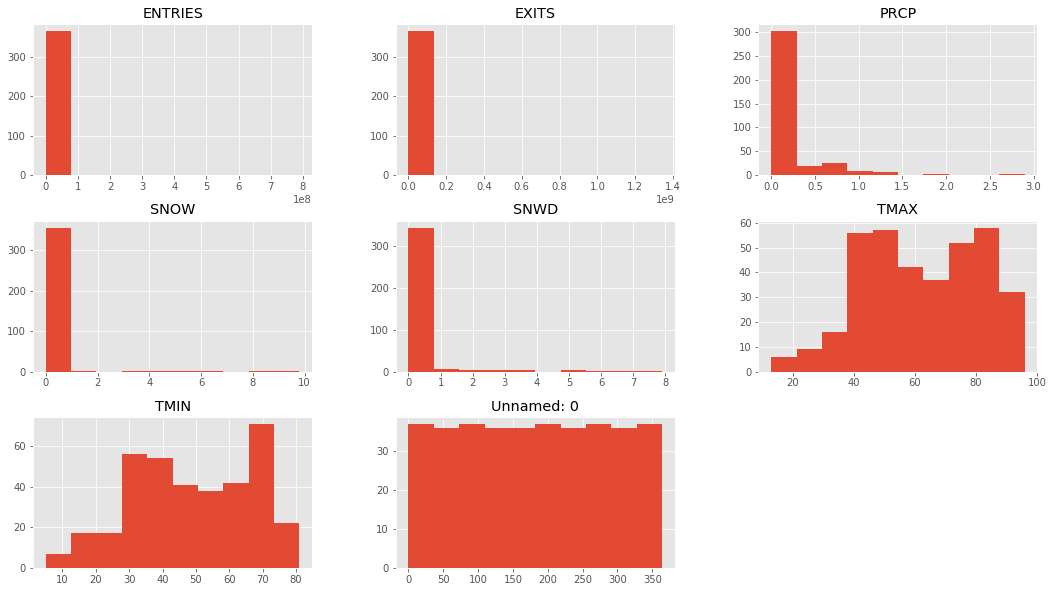

In [2]:
data.hist(figsize=(18,10) );

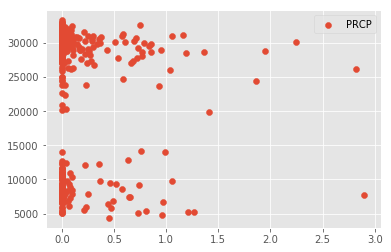

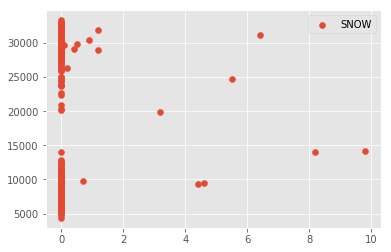

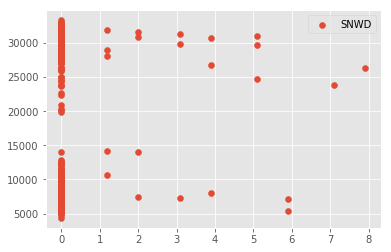

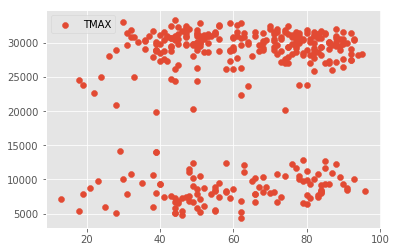

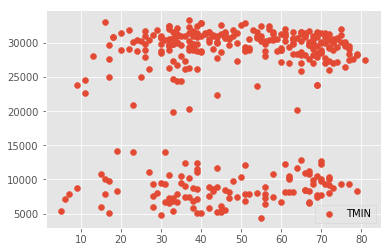

In [17]:
features = ['PRCP','SNOW','SNWD','TMAX','TMIN']
for column in features:
    plt.scatter(data[column], data.ENTRIES, label=column)
    plt.legend()
    plt.show()



In [6]:
# data.ENTRIES[data.ENTRIES > 45000]
# data.iloc[172], data.iloc[173], data.iloc[174]

# data.iloc[173].ENTRIES.replace(data.iloc[173].ENTRIES, (data.iloc[172].ENTRIES + data.iloc[174].ENTRIES) // 2)
data['ENTRIES'][173] = (data.iloc[172].ENTRIES + data.iloc[174].ENTRIES) // 2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
data['ENTRIES'][180] = (data.iloc[179].ENTRIES + data.iloc[181].ENTRIES) // 2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data['ENTRIES'][321] = (data.iloc[320].ENTRIES + data.iloc[322].ENTRIES) // 2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
data['ENTRIES'][211]

45

In [10]:
# Weekend
data['ENTRIES'][211] = (data.iloc[204].ENTRIES + data.iloc[218].ENTRIES) // 2 # Saturday
data['ENTRIES'][212] = (data.iloc[205].ENTRIES + data.iloc[219].ENTRIES) // 2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data.loc[218]

Unnamed: 0           218
DATE2         2018-07-07
ENTRIES            10031
EXITS              11174
PRCP                   0
SNOW                   0
SNWD                   0
TMAX                  78
TMIN                  62
Name: 218, dtype: object

In [12]:
data['ENTRIES'][323] = (data['ENTRIES'][316] + data['ENTRIES'][330])// 2#data.loc[316].ENTRIES # Saturday
data.loc[323] # Sunday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0           323
DATE2         2018-10-20
ENTRIES             6830
EXITS                 34
PRCP                0.06
SNOW                   0
SNWD                   0
TMAX                  62
TMIN                  51
Name: 323, dtype: object

In [13]:
data['ENTRIES'][324] = (data['ENTRIES'][317] + data['ENTRIES'][331]) // 2
data['ENTRIES'][324]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7168

In [50]:
# data[data.is_weekend == 0]

In [39]:
def is_weekend(date):
    if date.weekday() >= 5:
        return 1
    else: 
        return 0 

0

Timestamp('2017-12-05 00:00:00')

In [24]:
data['DATE2'] = pd.to_datetime(data.DATE2)

In [58]:
wkend_entries = data[data.is_weekend == 1]
# wkend_entries.ENTRIES

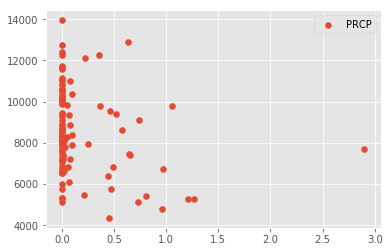

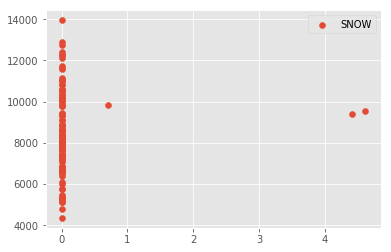

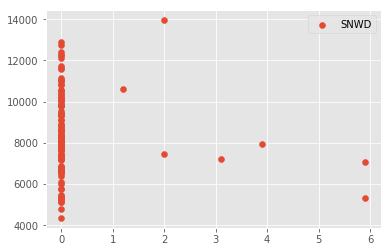

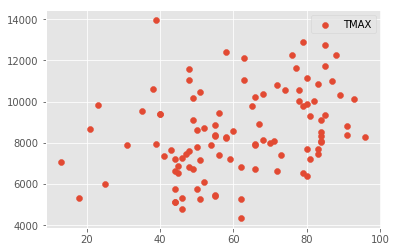

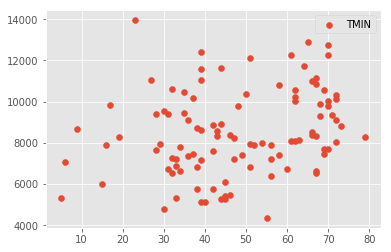

In [59]:
features = ['PRCP','SNOW','SNWD','TMAX','TMIN']
for column in features:
    plt.scatter(wkend_entries[column], wkend_entries.ENTRIES, label=column)
    plt.legend()
    plt.show()

In [42]:
# data['is_weekend'] = data.apply(lambda r: is_weekend(r.DATE2), axis=1)


 Subway Weekend - Regression Analysis and Diagnostics for formula:  ENTRIES~PRCP
--------------------------------------------------------------------------------------


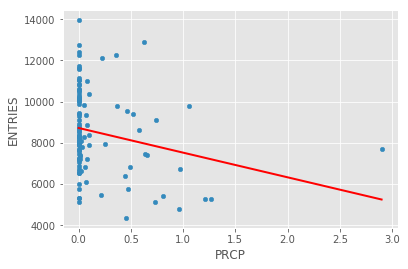

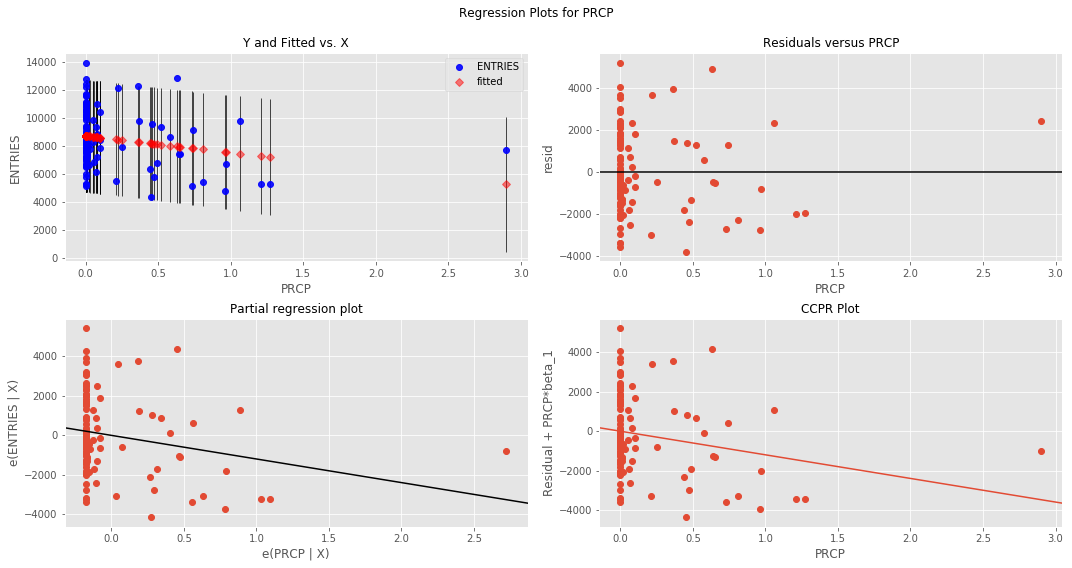

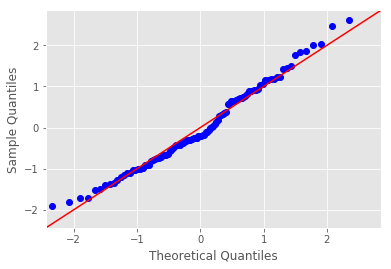

Press Enter to continue...

 Subway Weekend - Regression Analysis and Diagnostics for formula:  ENTRIES~SNOW
--------------------------------------------------------------------------------------


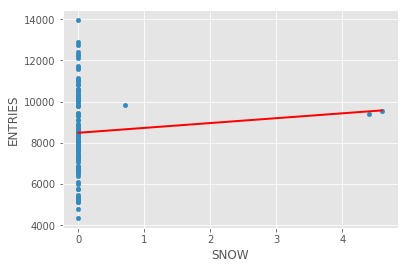

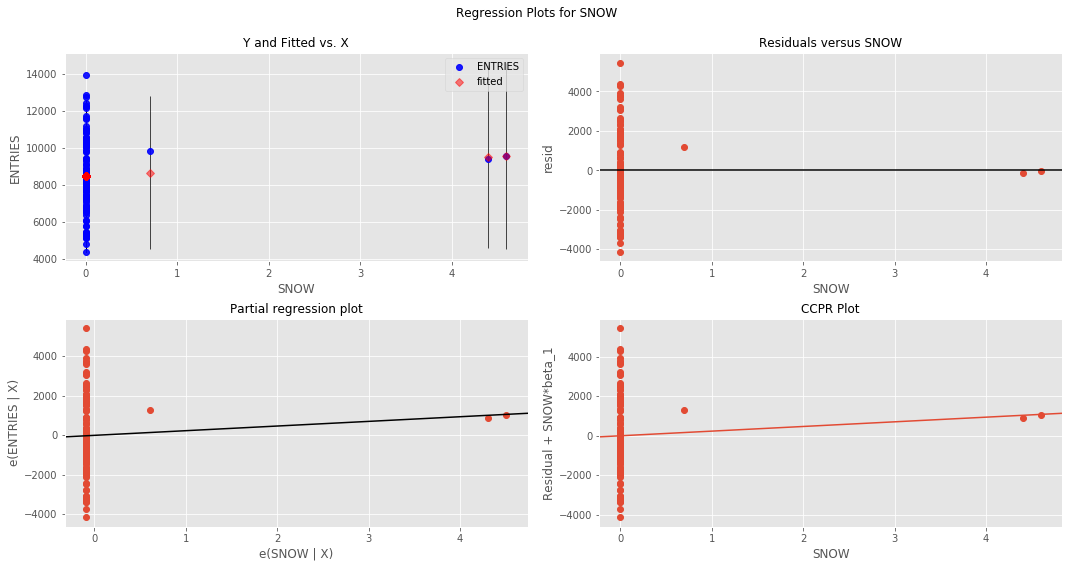

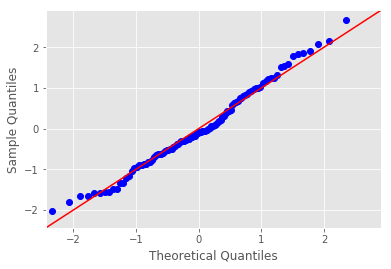

Press Enter to continue...

 Subway Weekend - Regression Analysis and Diagnostics for formula:  ENTRIES~SNWD
--------------------------------------------------------------------------------------


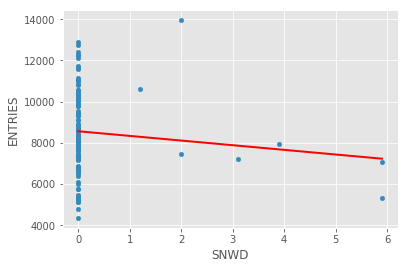

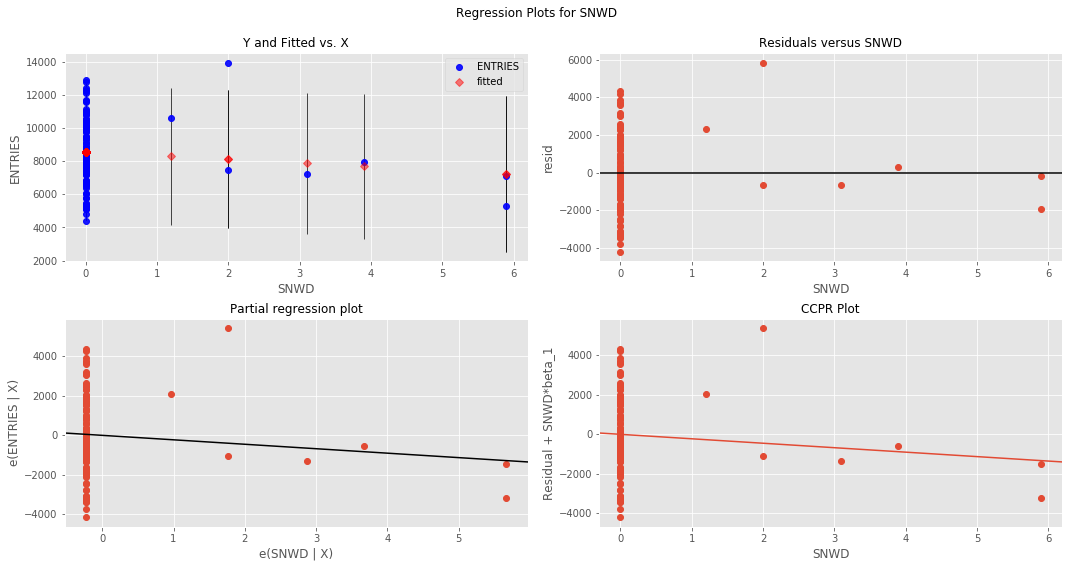

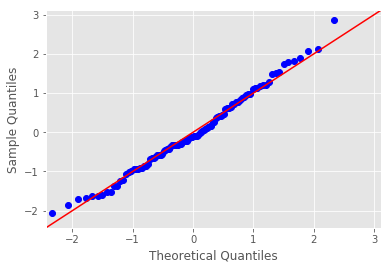

Press Enter to continue...

 Subway Weekend - Regression Analysis and Diagnostics for formula:  ENTRIES~TMAX
--------------------------------------------------------------------------------------


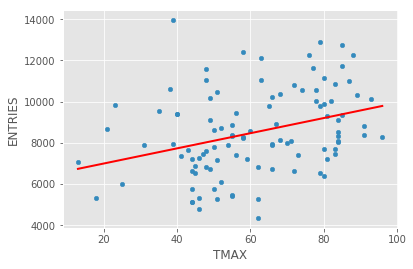

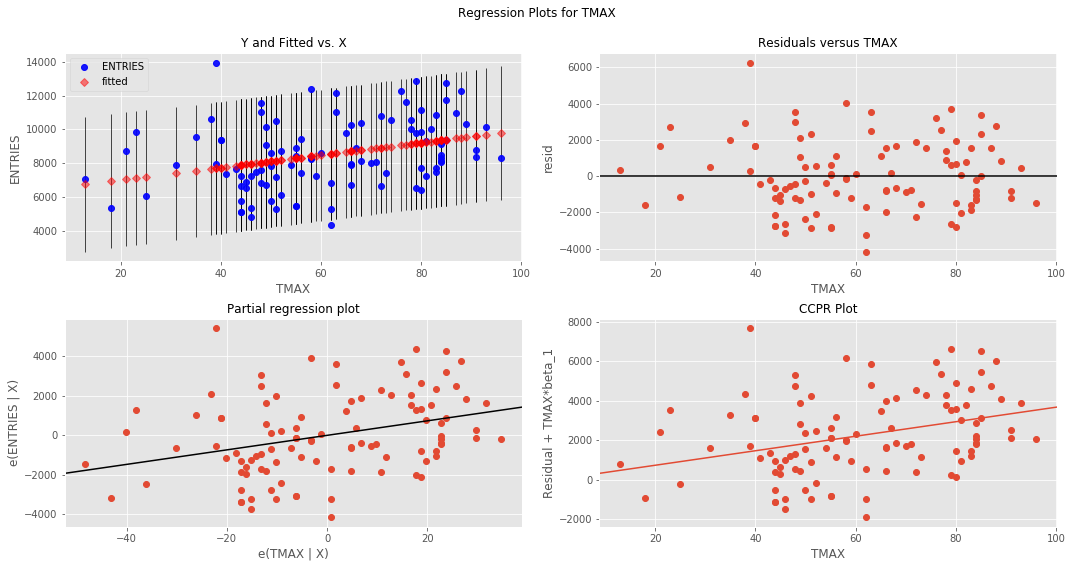

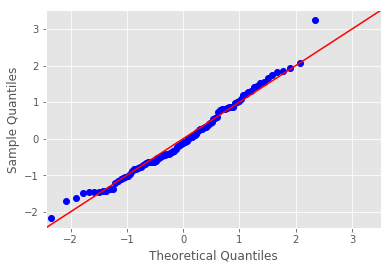

Press Enter to continue...

 Subway Weekend - Regression Analysis and Diagnostics for formula:  ENTRIES~TMIN
--------------------------------------------------------------------------------------


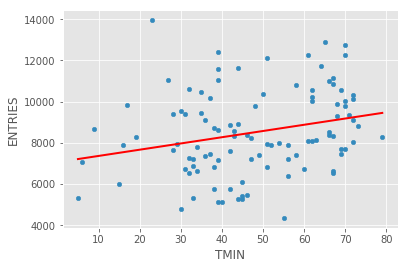

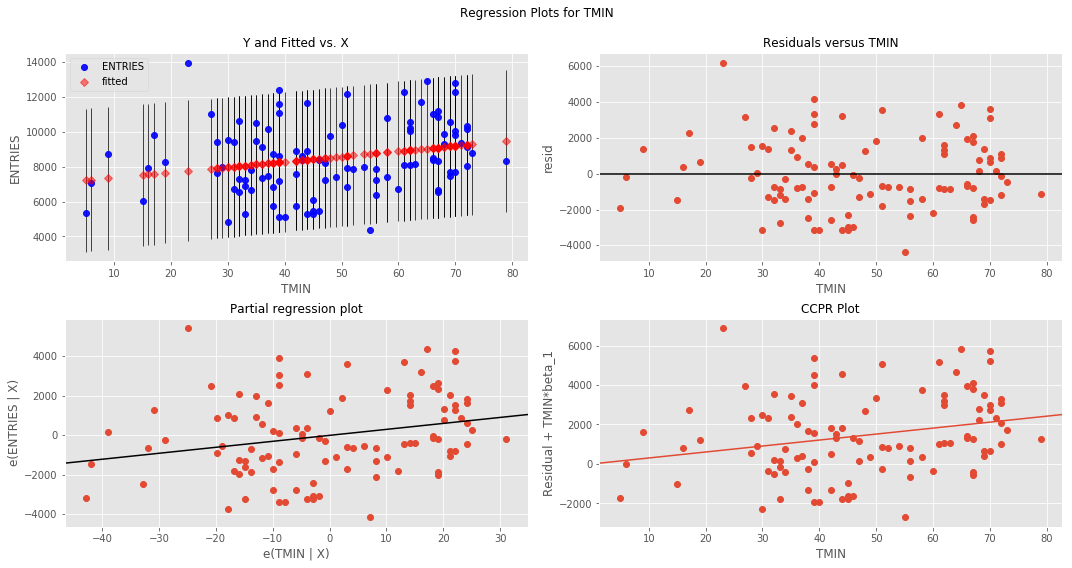

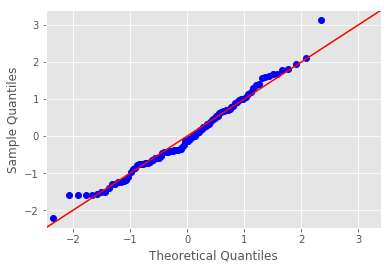

Press Enter to continue...


In [62]:
import scipy.stats as stats
import statsmodels.stats.api as sms


results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for feature in features: 
    f = 'ENTRIES~' + feature
    print('\n', "Subway Weekend - Regression Analysis and Diagnostics for formula: ",f)
    print("--------------------------------------------------------------------------------------")
    model = ols(formula=f, data=wkend_entries).fit()
    df_min_max = pd.DataFrame({feature: [wkend_entries[feature].min(), wkend_entries[feature].max()]})
    preds = model.predict(df_min_max)
    wkend_entries.plot(kind='scatter', x=feature, y='ENTRIES')
    plt.plot(df_min_max, preds, c='red', linewidth=2)
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, feature, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    results.append([feature, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])    
    input("Press Enter to continue...")

In [64]:
results_df = pd.DataFrame(results)